In [ ]:
#Analysis: 
#     -Rural Areas account for a negligible amount of users
#     -Urban traffic is the greates driver of profit based on sheer volume
#     -Suburban rates seem to be the most consistently high as they represent only about 25% of the total volume but about 30% of the total revenue
#     -Urban and Rural areas both account for less revenue than they do in volume of rides.

In [2]:
%matplotlib inline
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the Files
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)


city_df = city_df.drop_duplicates('city')
city_df.head()


# Merge 
combined_df = pd.merge(city_df, ride_df, on="city")

# Display preview of result
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [3]:
# types = combined_df["type"].unique()
# Cities = combined_df["city"].unique()
# print(types)
# print(Cities)

In [4]:
# Group on "city"
combined_df_city = combined_df.groupby("city")

# Calculate data of interest based on "city"
city_avg_fare = combined_df_city["fare"].mean()
city_total_rides = combined_df_city["ride_id"].count()
city_total_drivers = combined_df_city["driver_count"].mean()

In [5]:
# City and City Type indexed by city
city_type = combined_df.set_index('city')['type']
city_type.value_counts()
# city_type

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

In [6]:
# Dataframe-ify
city_type_df = city_type.to_frame()
city_type_df.head()

,type
city,
Richardfort,Urban
Richardfort,Urban
Richardfort,Urban
Richardfort,Urban
Richardfort,Urban


In [7]:

# Compile Data to DF, issue occurred with adding City Type.
processed_df = pd.DataFrame({"Average Fare per City":city_avg_fare,
                 "Number of Rides": city_total_rides,
                 "Number of Drivers": city_total_drivers
#                 "City Type": city_type_df
})
processed_df.head()

,Average Fare per City,Number of Drivers,Number of Rides
city,,,
Amandaburgh,24.641667,12,18
Barajasview,25.332273,26,22
Barronchester,36.422500,11,16
Bethanyland,32.956111,22,18
Bradshawfurt,40.064000,7,10


In [8]:
processed_type_df = pd.DataFrame.join(processed_df, city_type)

In [9]:
processed_type_df.head()

,Average Fare per City,Number of Drivers,Number of Rides,type
city,,,,
Amandaburgh,24.641667,12,18,Urban
Amandaburgh,24.641667,12,18,Urban
Amandaburgh,24.641667,12,18,Urban
Amandaburgh,24.641667,12,18,Urban
Amandaburgh,24.641667,12,18,Urban


In [10]:
processed_type_df_reindexed = processed_type_df.reset_index()

In [11]:
#Urban
urban = processed_type_df_reindexed.loc[combined_df["type"]== "Urban"]

#Suburban
suburban = processed_type_df_reindexed.loc[combined_df["type"]== "Suburban"]

#Rural
rural = processed_type_df_reindexed.loc[combined_df["type"]== "Rural"]

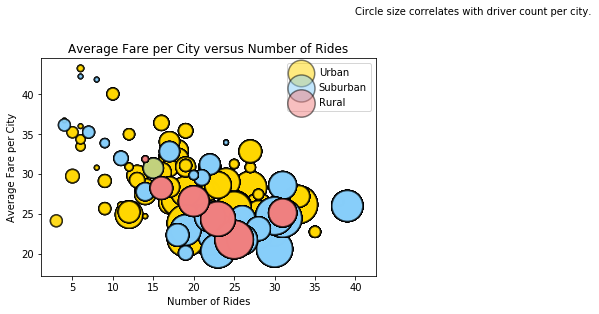

In [23]:
#Urban
plt.scatter(urban["Number of Rides"], urban["Average Fare per City"], color = "gold", edgecolors="black", s = urban["Number of Drivers"]*20, label = "Urban", alpha = 0.5, linewidth = 1.5)

#Suburban
plt.scatter(suburban["Number of Rides"], suburban["Average Fare per City"], color = "lightskyblue", edgecolors ="black", s = suburban["Number of Drivers"]*20, label = "Suburban", alpha = 0.5, linewidth = 1.5)

#Rural
plt.scatter(rural["Number of Rides"], rural["Average Fare per City"], color = "lightcoral", edgecolors = "black", s = rural["Number of Drivers"]*20, label = "Rural", alpha = 0.5, linewidth = 1.5)

#Add title, x axis label and y axis label.
plt.title("Average Fare per City versus Number of Rides")
plt.xlabel("Number of Rides")
plt.ylabel("Average Fare per City")
plt.text(40, 50,"Circle size correlates with driver count per city.")

#legend.
plt.legend(loc= "upper right")

#Show plot.
plt.show()

In [13]:
city_fare_pie = combined_df.groupby(["type"])["fare"].sum()
city_fare_pie

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [14]:
city_fare_pie.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

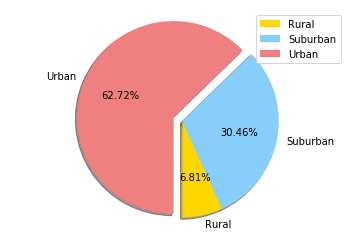

In [20]:
#colors of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

# explode the "Urban" section of the pie chart.

explode = (0,0, 0.1)

#Create the pie chart.
plt.pie(city_fare_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 270)

#equal axes.
plt.axis("equal")

#Add the legend.
plt.legend(loc = "upper right")

#Show the chart.
plt.show()

In [16]:
city_rides_pie = combined_df.groupby(["type"])["ride_id"].count()
city_rides_pie
city_drivers_pie = combined_df.groupby(["type"])["driver_count"].mean()
city_drivers_pie

type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64

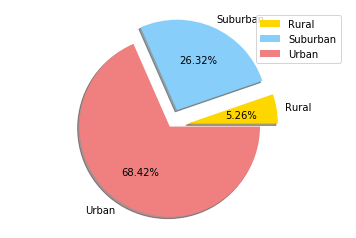

In [24]:
#Use the City Pie index for the wedge labels.
city_rides_pie.index

#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

#explode the first and second segments of the pie chart.

explode = (0.2,0.2,0)

#pie chart.
plt.pie(city_rides_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True)

#equal axes.
plt.axis("equal")

#Add the legend.
plt.legend(loc = "upper right")

#Show the pie chart.
plt.show()

In [18]:
city_drivers_pie = combined_df.groupby(["type"])["driver_count"].mean()
city_drivers_pie

type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64

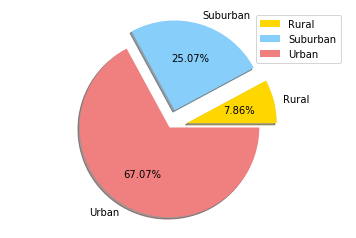

In [22]:
#Use the City Pie index for the wedge labels.
city_drivers_pie.index

#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

#explode the first and second segments of the pie chart.

explode = (0.2,0.2,0)

#pie chart.
plt.pie(city_drivers_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True)

#equal axes.
plt.axis("equal")

#Add the legend.
plt.legend(loc = "upper right")

#Show the pie chart.
plt.show()

In [8]:
# # combined_df["fare"].mean()
# # combined_df["fare"].max()
# # combined_df["fare"].min()
# x_axis = np.arange(0,41,5)
# y_axis = np.arange(15,50,5)

SyntaxError: invalid syntax (<ipython-input-8-1f4692deb0a5>, line 1)

In [40]:
# combined_df_city_index = combined_df.set_index("city")
# combined_df_city_index.head()

,driver_count,type,date,fare,ride_id
city,,,,,
Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [25]:
# city_rides = []
# for city in Cities:
#     city_rides = combined_df.loc[city].count
    

In [34]:
# combined_df_type_index = combined_df.set_index("type")

# Obtain the x and y coordinates for each of the three city types

urban_rides = combined_df_type_index.loc["Urban",["city","fare"]]
urban_avg_fares = combined_df_type_index.loc["Urban",["fare"]].mean()
suburban_rides = len(combined_df_type_index.loc["Suburban"])
suburban_fares = combined_df_type_index.loc["Suburban",["fare"]].mean()
rural_rides = len(combined_df_type_index.loc["Rural"])
rural_fares = combined_df_type_index.loc["Rural",["fare"]].mean()

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure

In [26]:
# rural_fares = combined_df_type_index.loc["Rural",["fare"]].mean()
# rural_fares

fare    34.62344
dtype: float64